In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [21]:
df = pd.read_csv('penguins_size.csv')
print(df.shape)
df.head()

(344, 7)


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [8]:
print(df['species'].value_counts())
print(df['island'].value_counts())

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64


In [9]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [ ]:
df.isna().any()

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [27]:
df.isna().any(axis=1)

0      False
1      False
2      False
3       True
4      False
       ...  
339     True
340    False
341    False
342    False
343    False
Length: 344, dtype: bool

In [29]:
# checking rows with NaN values
df[df.isna().any(axis=1)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [31]:
# since there are 2 rows that most of its column are null we can drop those 2 rows
df.drop([3, 339], axis=0, inplace=True)

In [32]:
# let's drop all the other rows
df.dropna(inplace=True)

In [35]:
print(df.isnull().sum())
df[df.isna().any(axis=1)]

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


In [36]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [ ]:
# we have this row that the sex is unknown 
# can we find out what its sex is?
df[df['sex'] == '.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [ ]:
# we are cheking 'Gentoo' by 'sex' to see its statistics info and since there are a lot of columns we would transpose it
df[df['species']=='Gentoo'].groupby('sex').describe().transpose()

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [45]:
# if we analys the table we would understand that it's highly that the penguin with '.' sex is female

df.at[336, 'sex'] = 'FEMALE'  # go to index 336 and sex column and change the value

In [51]:
df.loc[336]

species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm     217.0
body_mass_g          4875.0
sex                  FEMALE
Name: 336, dtype: object

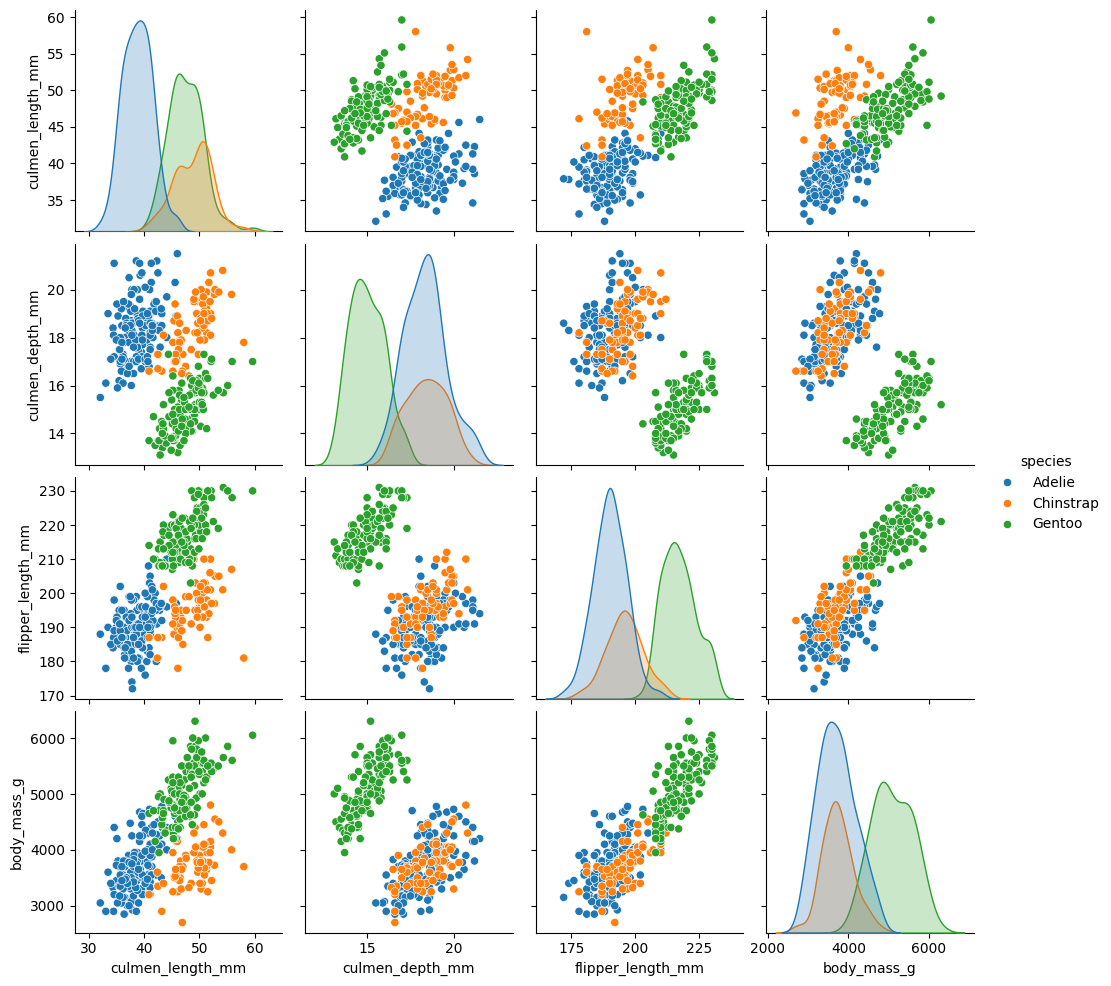

In [54]:
sns.pairplot(df, hue='species')

In [56]:
# in ML targer data doesn't have to be a number 
# but X data is a must
df.head()
# we have 2 columns that are not numeric and must be changed

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [60]:
# change object columns to number except 'species' column(we dropped it)
X = pd.get_dummies(df.drop('species', axis=1), dtype=int, drop_first=True)
y = df['species']

Train and Split

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Modeling

In [63]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
based_pred = model.predict(X_test)

Evaluation

error is: 0.03960396039603964
              precision    recall  f1-score   support

      Adelie       0.93      0.98      0.95        41
   Chinstrap       0.95      0.87      0.91        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.96       101
   macro avg       0.96      0.95      0.95       101
weighted avg       0.96      0.96      0.96       101



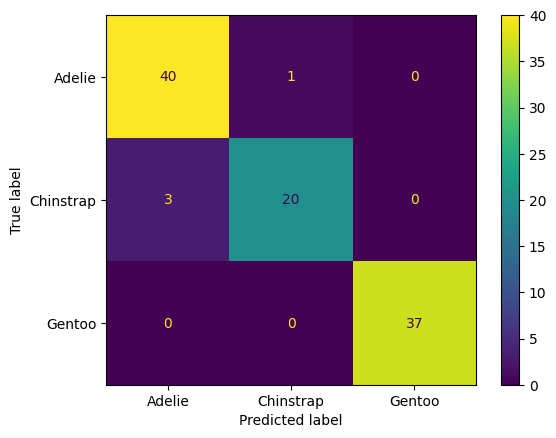

In [70]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
accuracy = accuracy_score(y_test, based_pred)
print(f'error is: {1 - accuracy}')
print(classification_report(y_test, based_pred))
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [72]:
print(X.columns)
print(model.feature_importances_)

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_MALE'],
      dtype='object')
[0.32352044 0.05366774 0.542054   0.00239775 0.0681854  0.01017467
 0.        ]


In [ ]:
pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['feature_importance']).sort_values(by='feature_importance')
# 'flipper_length_mm' and 'culmen_length_mm' have the most impact

,feature_importance
sex_MALE,0.000000
body_mass_g,0.002398
island_Torgersen,0.010175
culmen_depth_mm,0.053668
island_Dream,0.068185
culmen_length_mm,0.323520
flipper_length_mm,0.542054


plotting descision tree

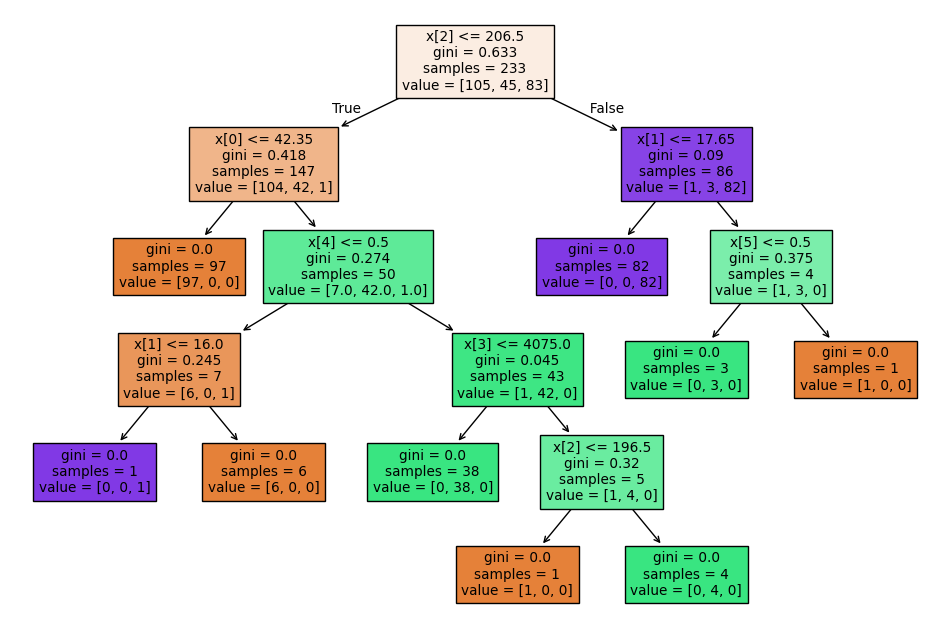

In [89]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True);

In [90]:
def report_model(model):
    model_preds = model.predict(X_test)

    print(classification_report(y_test, model_preds))
    
    plt.figure(figsize=(12, 8))
    plot_tree(model, filled=True);

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



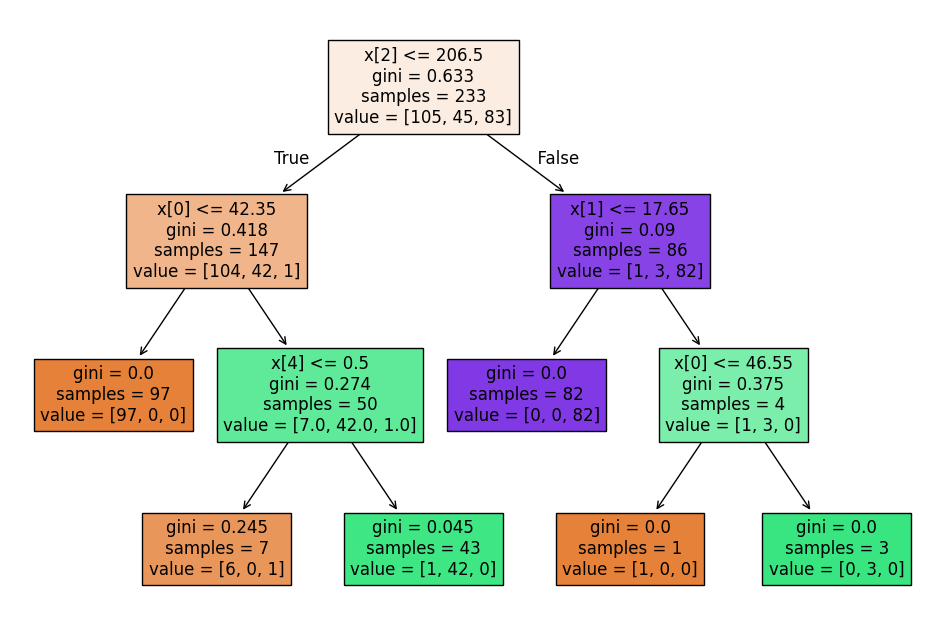

In [92]:
pruned_tree = DecisionTreeClassifier(max_depth=3)
pruned_tree.fit(X_train, y_train)
report_model(pruned_tree)

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.83      0.87      0.85        23
      Gentoo       0.93      1.00      0.96        37

    accuracy                           0.92       101
   macro avg       0.91      0.92      0.91       101
weighted avg       0.92      0.92      0.92       101



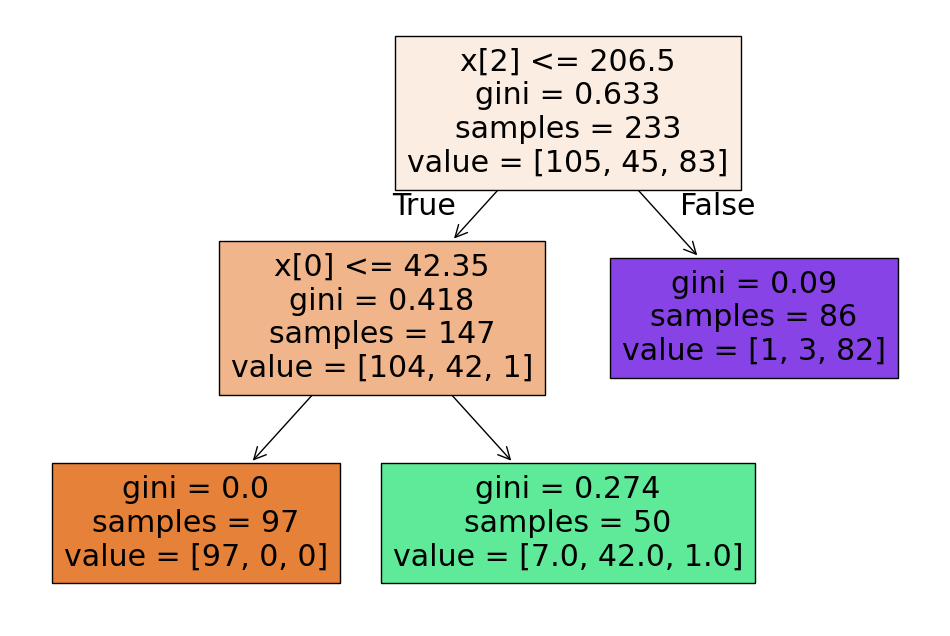

In [93]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train, y_train)
report_model(pruned_tree)

              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101



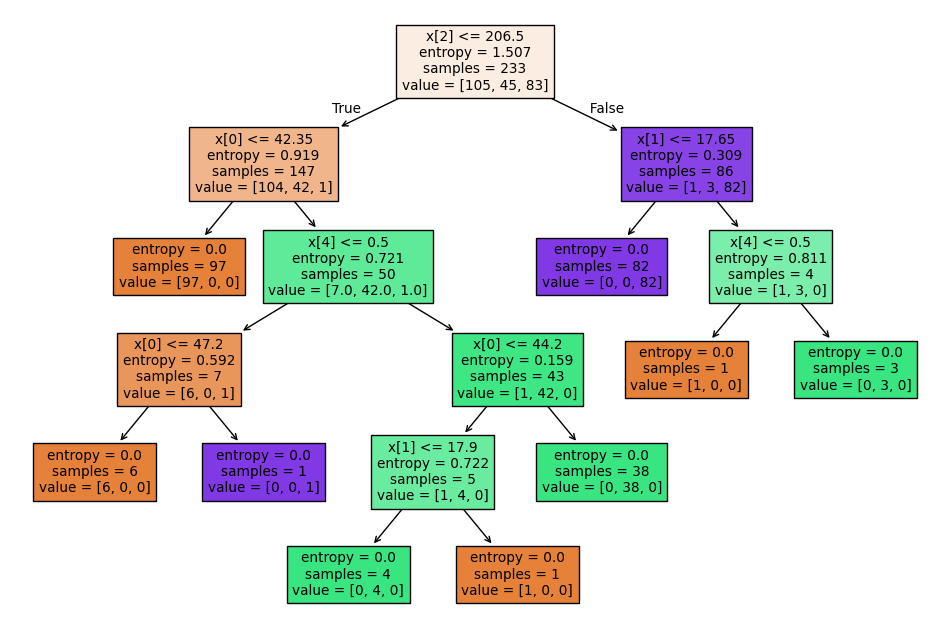

In [ ]:
pruned_tree = DecisionTreeClassifier(criterion='entropy')
pruned_tree.fit(X_train, y_train)
report_model(pruned_tree)